In [1]:
import os

import matplotlib.pyplot as plt
from PIL import Image

In [46]:
dir_ = "/workspace/mmsegmentation-pipeline/val_predictions_3"
ious = []
for file in os.listdir(dir_):
    with open(os.path.join(dir_, file), "r") as f:
        iou = float(f.readline().strip())
        ious.append({"file": file, "iou": iou})

In [47]:
# get 5% worst ious
ious.sort(key=lambda x: x["iou"])
worst_ious = ious[:int(len(ious) * 0.1)]
worst_ious

[{'file': '02ecf4a7-9bff-445c-92da-47402f314f3c_iou.txt', 'iou': 0.0},
 {'file': '039c23a1-344a-4362-8599-7a34e15fb704_iou.txt', 'iou': 0.0},
 {'file': '44818a43-869d-458d-99fa-8663acd8f9d2_iou.txt', 'iou': 0.0},
 {'file': '46c5d829-1d6e-44ac-a01c-f3bd5463b074_iou.txt', 'iou': 0.0},
 {'file': '4b084ce0-9e8c-45a7-809f-965c099126e4_iou.txt', 'iou': 0.0},
 {'file': '85cfa2e7-1251-42c7-a22f-9f7a3794c359_iou.txt', 'iou': 0.0},
 {'file': '956cc103-4558-45ac-946f-d42a99c6bf76_iou.txt', 'iou': 0.0},
 {'file': '9e4d5252-b03f-4731-9f0d-c558d729d19e_iou.txt', 'iou': 0.0},
 {'file': 'b9d06ce1-891b-4537-83d0-c897a7cfbcf2_iou.txt', 'iou': 0.0},
 {'file': 'de9ef6c5-1d6e-4605-8238-e626a697029c_iou.txt', 'iou': 0.0},
 {'file': 'e9f02aae-32f8-4230-9795-dc10db56e2d1_iou.txt', 'iou': 0.0},
 {'file': 'f1a2d32d-360f-434c-8938-a165d3a9f559_iou.txt', 'iou': 0.0},
 {'file': 'f4911e28-5d8f-4b6a-8694-512c299543ba_iou.txt', 'iou': 0.0},
 {'file': 'fe0811fb-f68d-4ca3-af98-13fac464bc7f_iou.txt', 'iou': 0.0},
 {'fil

In [3]:
image_dir = "/workspace/data/pipeline/images/train"
annotation_dir = "/workspace/data/pipeline/annotations/train"

worst_im_ms = []
for worst_iou in worst_ious:
    im = Image.open(os.path.join(image_dir, worst_iou["file"].replace("_iou.txt", ".png")))
    mask = Image.open(os.path.join(annotation_dir, worst_iou["file"].replace("_iou.txt", ".png")))
    worst_im_ms.append((im, mask))

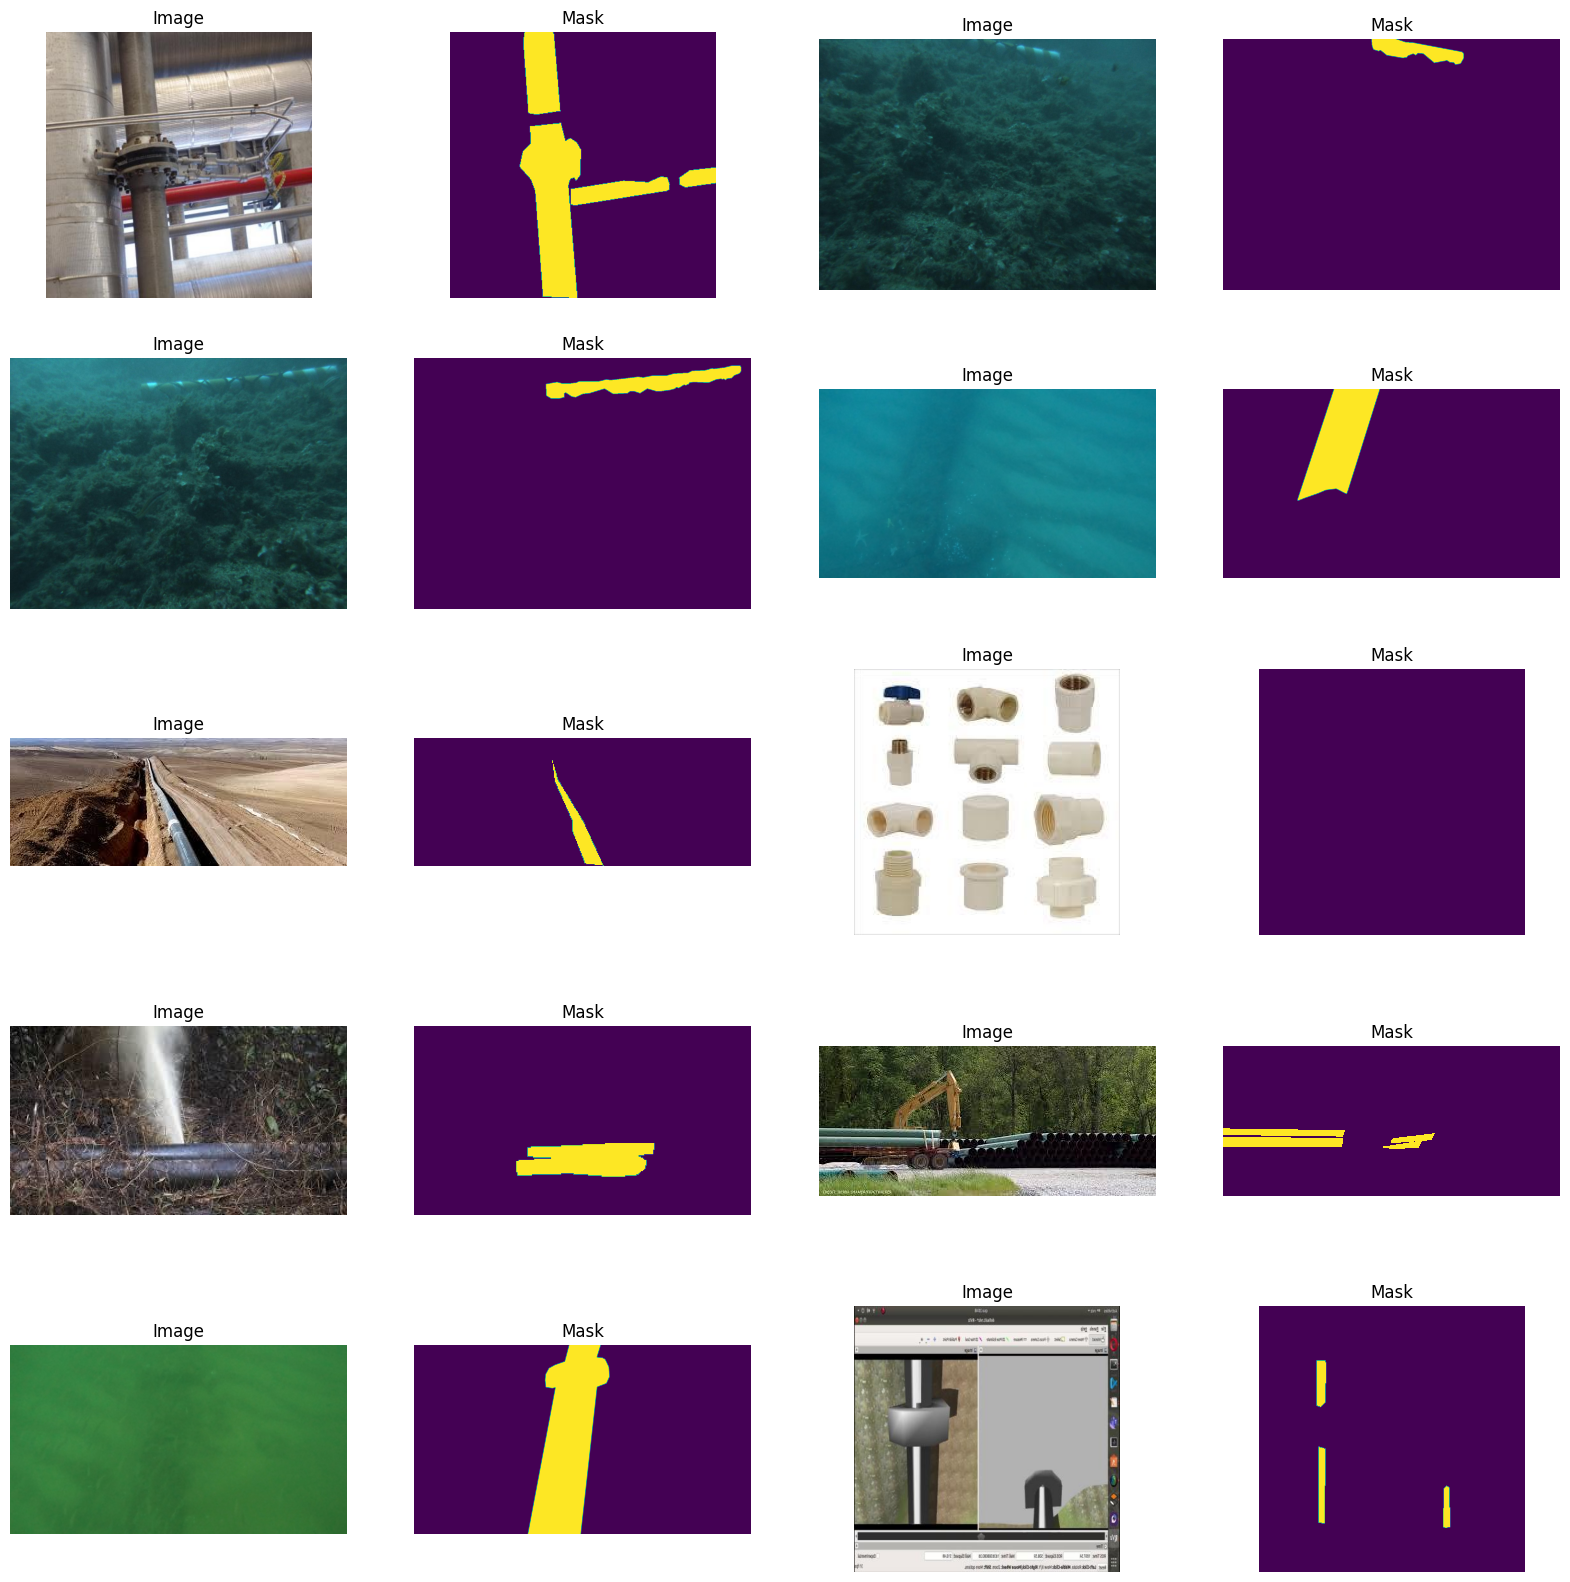

In [49]:
# random sample 10 images from worst ious
import random

samples = random.sample(worst_im_ms, 10)
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i, (im, mask) in enumerate(samples):
    axs[i // 2, i % 2 * 2].imshow(im)
    axs[i // 2, i % 2 * 2].axis("off")
    axs[i // 2, i % 2 * 2].set_title("Image")
    axs[i // 2, i % 2 * 2 + 1].imshow(mask)
    axs[i // 2, i % 2 * 2 + 1].axis("off")
    axs[i // 2, i % 2 * 2 + 1].set_title("Mask")


In [5]:
dirs = ["/workspace/mmsegmentation-pipeline/val_predictions_0",
        "/workspace/mmsegmentation-pipeline/val_predictions_1", 
        "/workspace/mmsegmentation-pipeline/val_predictions_2", 
        "/workspace/mmsegmentation-pipeline/val_predictions_3", 
        "/workspace/mmsegmentation-pipeline/val_predictions_4"]
ious = []

for dir_ in dirs:
    for file in os.listdir(dir_):
        with open(os.path.join(dir_, file), "r") as f:
            iou = float(f.readline().strip())
            ious.append({"file": file.replace("_iou.txt", ".png"), "iou": iou})


# get 10% worst ious
ious.sort(key=lambda x: x["iou"])
worst_ious = ious[:int(len(ious) * 0.1)]

with open("worst_10_percent_iou.txt", "w") as f:
    for worst_iou in worst_ious:
        f.write(f"{worst_iou['file']} {worst_iou['iou']}\n")

with open("all ious.txt", "w") as f:
    for iou in ious:
        f.write(f"{iou['file']} {iou['iou']}\n")

from tqdm import tqdm

os.makedirs("worst_10_percent_images", exist_ok=True)
for worst_iou in tqdm(worst_ious):
    im = Image.open(os.path.join(image_dir, worst_iou["file"]))
    mask = Image.open(os.path.join(annotation_dir, worst_iou["file"]))
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(im)
    axs[0].axis("off")
    axs[0].set_title("Image")
    axs[1].imshow(mask)
    axs[1].axis("off")
    axs[1].set_title("Mask")
    plt.savefig(os.path.join("worst_10_percent_images", worst_iou["file"]))
    plt.close()

100%|██████████| 722/722 [03:05<00:00,  3.89it/s]


In [4]:
import os

with open("/workspace/mmsegmentation-pipeline/notebooks/worst_10_percent_iou.txt", "r") as f:
        worst_ious = f.readlines()

files = [file.split(" ")[0] for file in worst_ious]
valid_files = os.listdir("/workspace/mmsegmentation-pipeline/notebooks/worst_10_percent_images")

invalid_files = [file for file in files if file not in valid_files]

In [7]:
# remove invalid files from images and annotations
for file in invalid_files:
    os.remove(os.path.join("/workspace/data/pipeline/images/train", file))
    os.remove(os.path.join("/workspace/data/pipeline/annotations/train", file))

In [8]:
with open("to_delet.txt", "w") as f:
    for file in invalid_files:
        f.write(file + "\n")